In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
# from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [31]:
df=pd.read_csv("data/DataPre-2-5050-split-2011-test.csv")
df.head()

,Unnamed: 0,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,loanPurp,worstCreditScore,bankNumber,stateNumber,mSA,zeroBalCode
0,0,3,4.875,100000,75,2,42,1,720,80,51,0,1
1,1,1,4.375,174000,78,1,34,2,693,54,20,39300,0
2,2,3,5.250,206000,80,2,34,1,627,32,45,26420,0
3,3,1,4.125,128000,72,1,42,1,776,54,43,43620,0
4,4,3,5.250,89000,75,1,23,1,709,15,45,19100,0


## Remove columns not involved in 'Foreclosure or Not' query

In [32]:
df.drop(['Unnamed: 0'],1,inplace=True)

In [33]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',
               'worstCreditScore':'int','zeroBalCode':'int'})
#,'zeroBalCode':'int'

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17228 entries, 0 to 17227
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   origChannel       17228 non-null  int64  
 1   origIntRate       17228 non-null  float64
 2   origUPB           17228 non-null  int64  
 3   origLTV           17228 non-null  int32  
 4   numBorrowers      17228 non-null  int32  
 5   origDebtIncRatio  17228 non-null  int32  
 6   loanPurp          17228 non-null  int64  
 7   worstCreditScore  17228 non-null  int32  
 8   bankNumber        17228 non-null  int64  
 9   stateNumber       17228 non-null  int64  
 10  mSA               17228 non-null  int64  
 11  zeroBalCode       17228 non-null  int32  
dtypes: float64(1), int32(5), int64(6)
memory usage: 1.2 MB


In [35]:
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,loanPurp,worstCreditScore,bankNumber,stateNumber,mSA,zeroBalCode
0,3,4.875,100000,75,2,42,1,720,80,51,0,1
1,1,4.375,174000,78,1,34,2,693,54,20,39300,0
2,3,5.250,206000,80,2,34,1,627,32,45,26420,0
3,1,4.125,128000,72,1,42,1,776,54,43,43620,0
4,3,5.250,89000,75,1,23,1,709,15,45,19100,0


In [36]:
df.drop(['stateNumber'], 1, inplace = True)

In [37]:
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,loanPurp,worstCreditScore,bankNumber,mSA,zeroBalCode
0,3,4.875,100000,75,2,42,1,720,80,0,1
1,1,4.375,174000,78,1,34,2,693,54,39300,0
2,3,5.250,206000,80,2,34,1,627,32,26420,0
3,1,4.125,128000,72,1,42,1,776,54,43620,0
4,3,5.250,89000,75,1,23,1,709,15,19100,0


<a id='MLReady'></a>

<a id='MLReady'></a>
## *MLReady.csv file loading point
uncomment one of the boxes below

# Pycaret - Setup with categorical definition

### Use complex setup 

In [39]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , pca = False 
    , ignore_low_variance = True # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value.
    , normalize = True
    , ignore_features = None
    , handle_unknown_categorical = True
    , remove_outliers = True # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
    , bin_numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'origDebtIncRatio'
            , 'worstCreditScore'
        ] # Set to True to bin numerics using K Means
    , feature_selection = True
    , silent = True
    , profile = False
    , numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'origDebtIncRatio'
            , 'worstCreditScore'
            , 'mSA'
        ]
    , categorical_features = [
            'bankNumber'
            , 'loanPurp'
            , 'numBorrowers'
            , 'origChannel'
        ]
)


 
Setup Succesfully Completed!


,Description,Value
0,session_id,8655
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(17228, 11)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with no blacklist exclusions

In [40]:
model_results=compare_models(fold = 2, turbo = True)
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.918200,0.973800,0.929700,0.911500,0.920500,0.836300
1,Random Forest Classifier,0.886700,0.959100,0.925600,0.862000,0.892700,0.773000
2,Decision Tree Classifier,0.845800,0.843900,0.947900,0.790700,0.862200,0.690300
3,CatBoost Classifier,0.836000,0.909300,0.912600,0.795500,0.850000,0.671000
4,Light Gradient Boosting Machine,0.795400,0.874100,0.866400,0.763700,0.811800,0.589600
5,Gradient Boosting Classifier,0.716400,0.791300,0.765300,0.703800,0.733200,0.431700
6,K Neighbors Classifier,0.712700,0.777800,0.862100,0.669100,0.753400,0.422200
7,Extreme Gradient Boosting,0.712500,0.786400,0.762900,0.699700,0.729800,0.423800
8,Logistic Regression,0.692500,0.752400,0.735800,0.684100,0.709000,0.383900
9,Linear Discriminant Analysis,0.692400,0.752500,0.743700,0.681300,0.711100,0.383500


## Create models 

#### Extra Trees

In [38]:
et = create_model('et', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7401,0.8381,0.7702,0.7347,0.7520,0.4794
1,0.7424,0.8360,0.7667,0.7394,0.7528,0.4840
2,0.7527,0.8411,0.7711,0.7519,0.7614,0.5048
3,0.7455,0.8486,0.7796,0.7375,0.7580,0.4901
4,0.7406,0.8506,0.7665,0.7367,0.7513,0.4804
5,0.7581,0.8544,0.7752,0.7573,0.7662,0.5157
6,0.7567,0.8546,0.8191,0.7352,0.7749,0.5119
7,0.7491,0.8474,0.7700,0.7470,0.7583,0.4976
8,0.7652,0.8503,0.7761,0.7674,0.7717,0.5299
9,0.7539,0.8472,0.7858,0.7465,0.7656,0.5070


## Evaluate Models

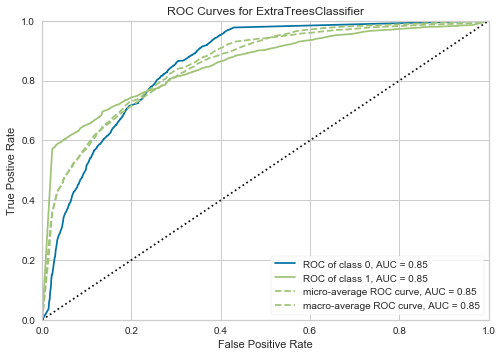

In [39]:
plot_model(et)

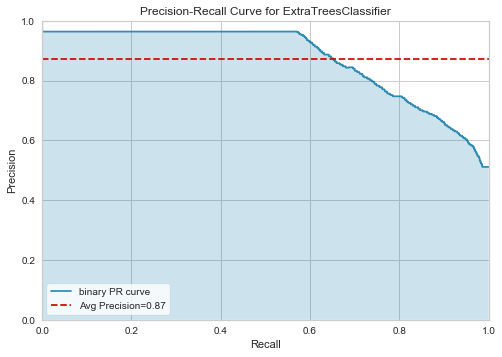

In [40]:
plot_model(et, plot = 'pr')

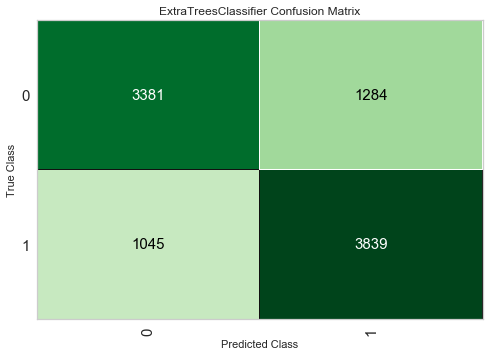

In [41]:
plot_model(et, plot='confusion_matrix')

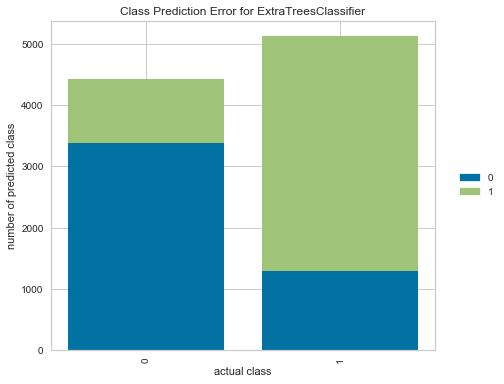

In [42]:
plot_model(et, plot = 'error')

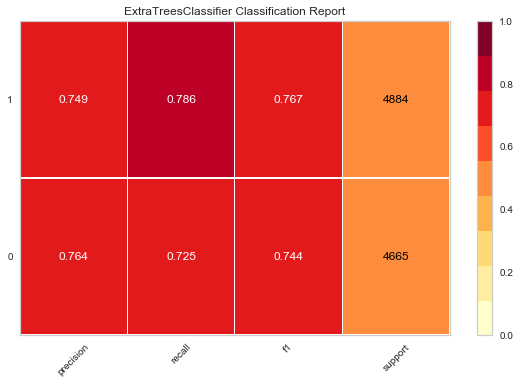

In [43]:
plot_model(et, plot = 'class_report')

# Predict models

In [45]:
pred_holdout = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.7561,0.8541,0.786,0.7494,0.7673,0.5114


# Recombine X_test_res, y_test_res so PyCaret can deal with one df

In [46]:
test_target.shape

(11970,)

In [47]:
df = training_features.copy()

In [48]:
df['zeroBalCode'] = test_target

In [49]:
df.shape

(107726, 7)

# The golden moment... put 10% sample test data through the model...

In [50]:
predictions = predict_model(et, data=df)

In [51]:
pd.set_option('max_columns',None)
predictions.tail()

,origIntRate,origUPB,origLTV,origDebtIncRatio,worstCreditScore,fmacRateAvg,zeroBalCode,Label,Score
107721,5.750,57000,44,26,790,5.4200,NaN,0,0.46
107722,4.625,191000,24,16,811,5.2220,NaN,0,0.12
107723,4.375,152000,70,54,698,4.8575,NaN,1,0.71
107724,4.000,286000,64,26,663,3.5500,NaN,0,0.07
107725,4.500,236000,59,43,631,4.9525,NaN,0,0.25


In [53]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107726 entries, 0 to 107725
Data columns (total 9 columns):
origIntRate         107726 non-null float64
origUPB             107726 non-null int64
origLTV             107726 non-null int32
origDebtIncRatio    107726 non-null int32
worstCreditScore    107726 non-null int32
fmacRateAvg         107726 non-null float64
zeroBalCode         0 non-null float64
Label               107726 non-null int32
Score               107726 non-null float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 5.8 MB


In [54]:
save_model(et, 'et6features')

Transformation Pipeline and Model Succesfully Saved
